In [24]:
import sys
import import_ipynb
import csv
import torch.nn
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import glob
import tensorflow
import keras

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Dropout
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
import csv 
import sys
FILE='testful'
f=open(FILE)
out=[]
for line in f:
    line=line.rstrip("/n")
    templist=line.split(",")
    out.append(templist)
for i in range(len(out)):
    out[i].pop()

In [27]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

data =np.array(out)

In [28]:
for array in range(len(data)):
    for element in range(len(data[array])): 
        
        if data[array][element]=='':
            data[array][element]=0

for array in range(len(data)):
    for element in range(len(data[array])): 
        
        if is_number(data[array][element]):
            continue
        else:
            data[array][element]=int(''.join(str(ord(c)) for c in data[array][element]))
data[0][17]
            

0

In [29]:
data = [x for x in data if x]
for array in range(len(data)):
    num=0
    for i in range(6):
        if int(data[array][len(data[array])-1-i])>num:
            num=data[array][len(data[array])-1-i]
    del data[array][-6:]
    data[array].append(num)

In [30]:
data[0:4]

[['0',
  '7',
  '115109112',
  '1',
  '8',
  '8',
  '0',
  '16',
  '3',
  '3',
  '0',
  '99111109112117116101',
  '11297114116'],
 ['2066',
  '7',
  115109112,
  '1',
  '8',
  '8',
  '0',
  '16',
  '3',
  '3',
  '0',
  99111109112117116101,
  11297114116],
 ['2225',
  '7',
  115109112,
  '1',
  '8',
  '8',
  '0',
  '16',
  '3',
  '3',
  '0',
  99111109112117116101,
  11297114116],
 ['5240',
  '7',
  115109112,
  '1',
  '8',
  '8',
  '0',
  '16',
  '3',
  '3',
  '0',
  99111109112117116101,
  851101141011151111081189798108101]]

In [16]:
myFile = open('weirdo', 'w')
#s=["LANL Hardware/Systems/Software Failure Data LA-UR-05-7318  dates mid 1996 to mid 2005,,,,,,,,,,,,,,,,,,,,,,,,,System,machine type,nodes,procstot,procsinnode,nodenum,nodenumz,node install,node prod,node decom,fru type,mem,cputype,memtype,num intercon,purpose,Prob Started (mm/dd/yy hh:mm),Prob Fixed (mm/dd/yy hh:mm),Down Time,Facilities,Hardware,Human Error,Network,Undetermined,Software,Same Event"]
#data=s+data
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(data)

In [17]:
files = sorted(glob.glob('SORTED_DATA'))

In [18]:
df = pd.concat(map(pd.read_csv, files))

In [59]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = np.array(data)
min_max_scaler = preprocessing.MinMaxScaler()
values = min_max_scaler.fit_transform(values)

In [60]:
pd.DataFrame(values)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
1,0.000382,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
2,0.000411,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
3,0.000969,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.025671e-41
4,0.003030,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
5,0.005150,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
6,0.005682,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
7,0.006304,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
8,0.007014,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64
9,0.007286,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.361428e-64


In [61]:
min_max_scaler = preprocessing.MinMaxScaler()
values = min_max_scaler.fit_transform(values)
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

In [62]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
1,0.000000,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
2,0.000382,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
3,0.000411,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,1.025610e-41
4,0.000969,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
5,0.003030,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
6,0.005150,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
7,0.005682,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
8,0.006304,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
9,0.007014,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00
10,0.007286,0.227273,1.161450e-12,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,...,0.000977,0.001300,0.031250,0.000000,0.015625,0.375,0.375,0.000000,9.611709e-24,0.000000e+00


In [63]:
values = reframed.values
n_train_hours = 18000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
values[0]

array([0.0000000e+00, 2.2727273e-01, 1.1614498e-12, 9.7656250e-04,
       1.3003901e-03, 3.1250000e-02, 0.0000000e+00, 1.5625000e-02,
       3.7500000e-01, 3.7500000e-01, 0.0000000e+00, 9.6117093e-24,
       0.0000000e+00, 3.8208321e-04, 2.2727273e-01, 1.1614498e-12,
       9.7656250e-04, 1.3003901e-03, 3.1250000e-02, 0.0000000e+00,
       1.5625000e-02, 3.7500000e-01, 3.7500000e-01, 0.0000000e+00,
       9.6117093e-24, 0.0000000e+00], dtype=float32)

In [64]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18000, 1, 25) (18000,) (5738, 1, 25) (5738,)


In [65]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))


#TODO: TEST
model.summary()



model.compile(loss='mae', optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                15200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 15,251
Trainable params: 15,251
Non-trainable params: 0
_________________________________________________________________


Train on 18000 samples, validate on 5738 samples
Epoch 1/100
 - 1s - loss: 0.0160 - val_loss: 0.0124
Epoch 2/100
 - 0s - loss: 0.0070 - val_loss: 0.0040
Epoch 3/100
 - 0s - loss: 0.0069 - val_loss: 0.0065
Epoch 4/100
 - 0s - loss: 0.0076 - val_loss: 0.0049
Epoch 5/100
 - 0s - loss: 0.0051 - val_loss: 0.0029
Epoch 6/100
 - 0s - loss: 0.0055 - val_loss: 0.0035
Epoch 7/100
 - 0s - loss: 0.0034 - val_loss: 0.0026
Epoch 8/100
 - 0s - loss: 0.0029 - val_loss: 0.0018
Epoch 9/100
 - 0s - loss: 0.0055 - val_loss: 0.0046
Epoch 10/100
 - 0s - loss: 0.0036 - val_loss: 0.0025
Epoch 11/100
 - 0s - loss: 0.0036 - val_loss: 0.0018
Epoch 12/100
 - 0s - loss: 0.0073 - val_loss: 0.0019
Epoch 13/100
 - 0s - loss: 0.0032 - val_loss: 0.0026
Epoch 14/100
 - 0s - loss: 0.0028 - val_loss: 0.0035
Epoch 15/100
 - 0s - loss: 0.0021 - val_loss: 0.0017
Epoch 16/100
 - 0s - loss: 0.0028 - val_loss: 0.0023
Epoch 17/100
 - 0s - loss: 0.0034 - val_loss: 0.0023
Epoch 18/100
 - 0s - loss: 0.0023 - val_loss: 0.0019
Epoch 

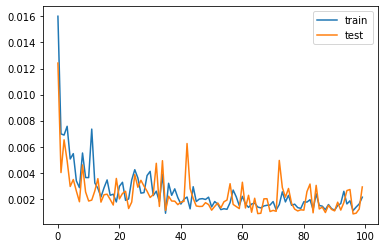

In [66]:
history = model.fit(train_X, train_y, epochs=100, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

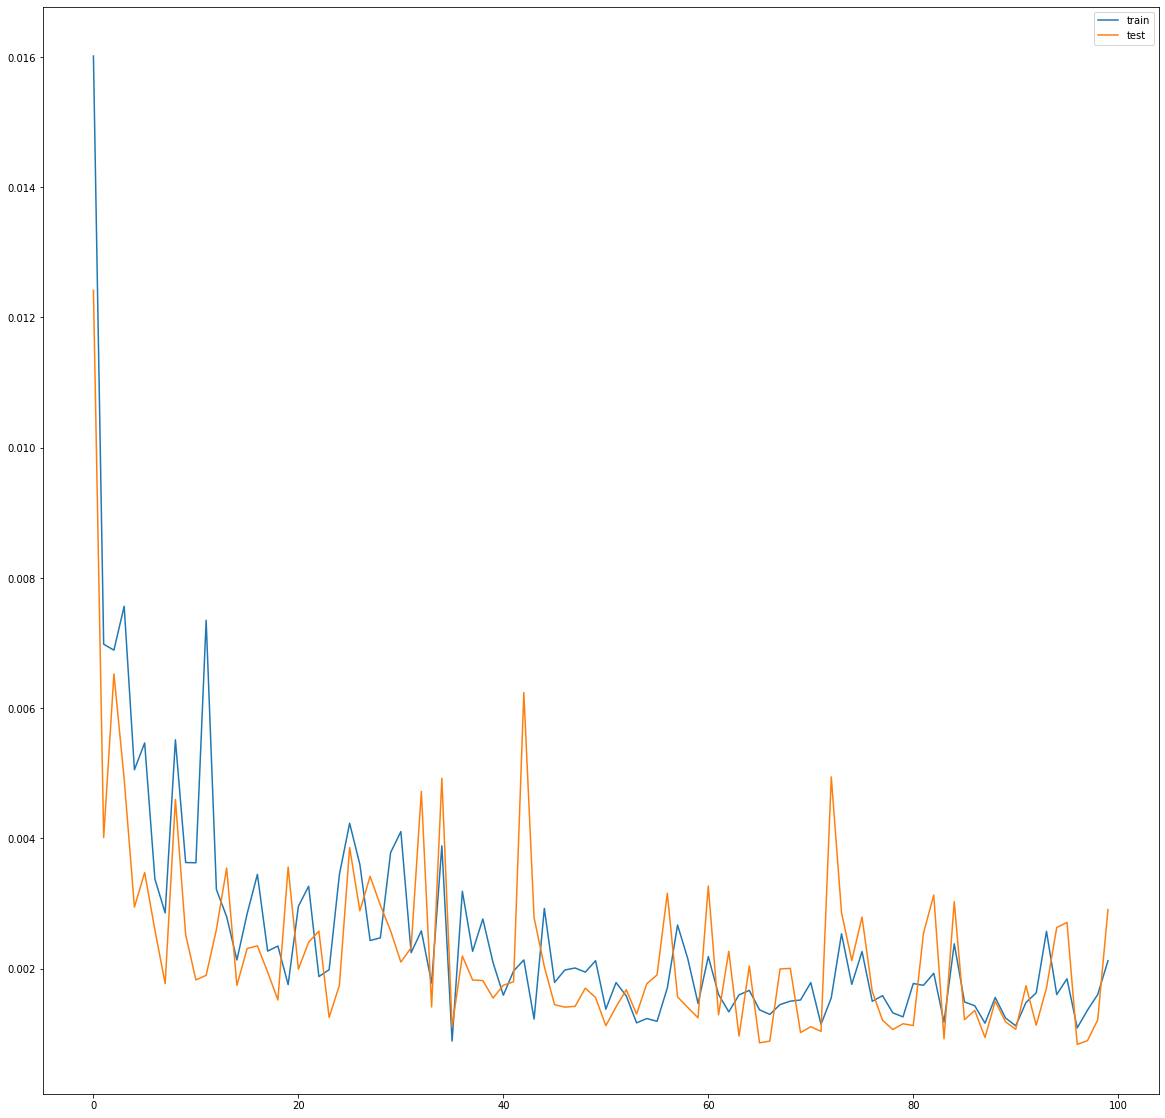

In [90]:
pyplot.figure(figsize=(20,20))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [67]:
yhat = model.predict(test_X)

In [68]:
from sklearn.metrics import accuracy_score
lol=[]
for i in yhat:
    lol.append(i[0])
#score=clf.score(np.array(lol),test_y)
rmse = sqrt(mean_squared_error(test_y, np.array(lol)))

In [69]:
rmse

0.013586836763251318

In [43]:
import pylab



In [70]:
np.delete(test_y,np.amax(test_y))

D:\anish\Documents\RESEARCH\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.


array([0.e+00, 1.e-44, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00], dtype=float32)

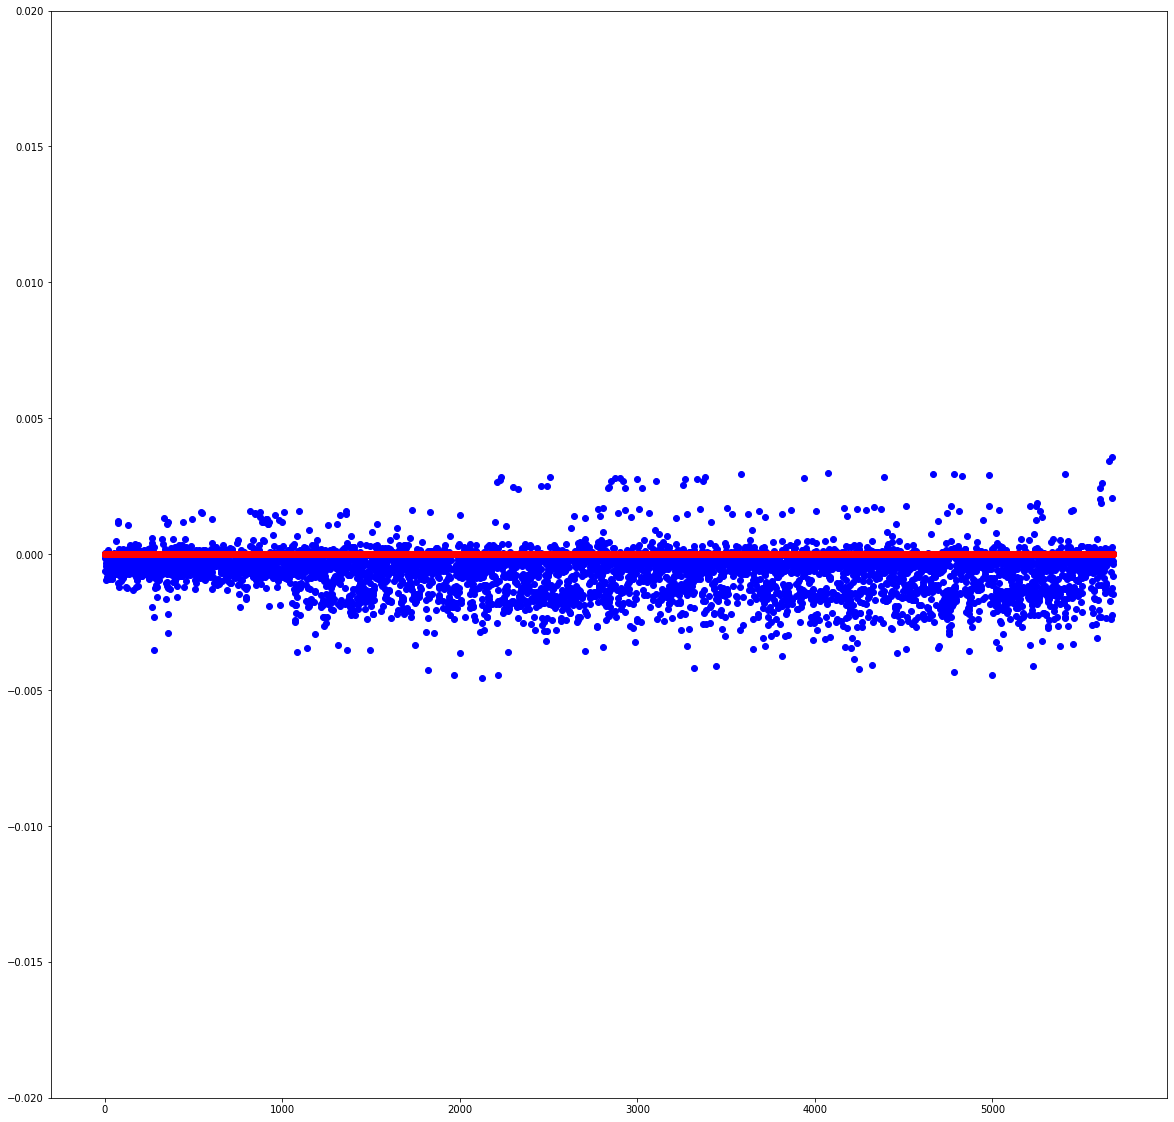

In [91]:
a=range(len(A))
plt.figure(figsize=(20,20))
plt.scatter(a,A,color='b')
plt.scatter(a,I,color='r')
pylab.ylim([-0.02,.02])
plt.show()

In [88]:
A=[X+.002 for X in A]
A=[X for X in A if X<.005]
I=test_y[:len(A)]

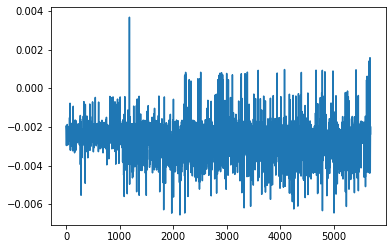

In [85]:
plt.plot(A)

In [25]:

lol

[-0.0012454205,
 -0.0011227957,
 -0.001211277,
 -0.0015194276,
 -0.00075995404,
 0.00028212764,
 -4.085085e-05,
 -8.406327e-05,
 0.00058176427,
 -0.001097603,
 -0.0014343812,
 -0.0009563928,
 -0.00077514624,
 -0.0009314269,
 0.0006685719,
 4.0672603e-07,
 -0.00096653245,
 -0.0005089581,
 -0.00037719854,
 -0.001099928,
 -0.0012594577,
 -0.0012678488,
 4.8231886e-05,
 0.0027574266,
 0.0016768983,
 -0.0005427923,
 -0.0011706506,
 -0.00091316184,
 -0.0011054139,
 -0.0013818822,
 -0.0011466625,
 -0.0011669616,
 -0.0011044473,
 -0.00029064968,
 -0.0006623012,
 -0.0011948776,
 -0.0014583302,
 -0.00079650816,
 -0.00089689385,
 -0.0006871255,
 -0.0004417735,
 -0.0011114515,
 -0.0013289946,
 -0.00087423855,
 -0.0009323966,
 -0.0013566164,
 1.2840057e-05,
 0.001332047,
 -0.00017356855,
 -0.0012912783,
 -0.0014173111,
 -0.0010974049,
 -0.0011765687,
 -0.001379595,
 0.0005757614,
 0.0016207495,
 -0.00025386782,
 0.00075249525,
 0.0016068636,
 -0.0005661185,
 -0.0013859667,
 -0.0013695161,
 -0.00147

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast

In [ ]:
test_X[:,1:][0]

In [ ]:
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)